In [64]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
task_name = "multirc"

fname_short = f"faithfulness_metrics/{task_name}/topk-test-faithfulness-metrics-description.json"

with open(fname_short, "r") as file : data_short = json.load(file) 
    
fname_long = f"double_faithfulness_metrics/{task_name}/topk-test-faithfulness-metrics-description.json"

with open(fname_long, "r") as file : data_long = json.load(file) 


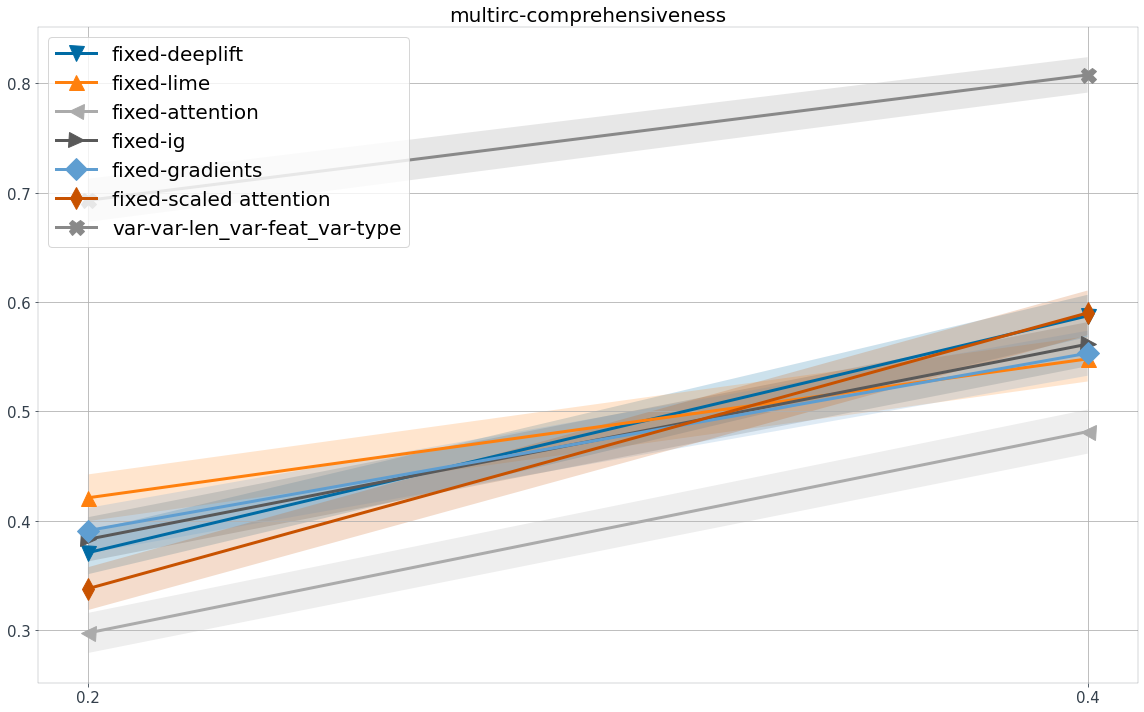

In [67]:
keep = {
    "fixed-deeplift" : {
        "marker" : "v"
    },
    "fixed-ig" : {
        "marker" : ">"
    },
    "fixed-lime" : {
        "marker" : "^"
    },
    "fixed-attention" : {
        "marker" : "<"
    },
    "fixed-scaled attention" : {
        "marker" : "d"
    },
    "fixed-gradients": {
        "marker" : "D"
    },
    "var-var-len_var-feat_var-type" : {
        "marker" : "X"
    }
}

metric = "comprehensiveness"

plt.style.use('tableau-colorblind10')
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.2
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams["font.variant"] = "small-caps"

fig, ax = plt.subplots(figsize = (16,10))

if task_name == "evinf":
    
    plt.xticks([0.2, 0.4], fontsize=15)
    
else:

    plt.xticks([0.2, 0.4], fontsize=15)

for feat_attr, val in data_long.items():
    
    if feat_attr in keep:
        
        short = data_short[feat_attr][metric]
        long = val[metric]
            
        ax.plot(
            [0.2, 0.4],
            [short["mean"], long["mean"]],
            marker=keep[feat_attr]["marker"],
            markersize = 15,
            linewidth = 3,
            label=feat_attr
        )
            
        ax.fill_between(
            [0.2, 0.4],
            [short["mean"]-short["std"]*0.05, long["mean"]-long["std"]*0.05],
            [short["mean"]+short["std"]*0.05, long["mean"]+long["std"]*0.05],
            alpha=0.2
        )    

plt.legend(loc = "upper left", fontsize = 20)
plt.yticks(fontsize=15)

plt.title(f"{task_name}-{metric}", fontsize = 20)

plt.grid()
plt.tight_layout()

os.makedirs("graphs_and_tables/doubling_the_length/", exist_ok = True)

fig.savefig(f"graphs_and_tables/doubling_the_length/{task_name}-{metric}.png", dpi = 300)#, bbox_inches="tight")
